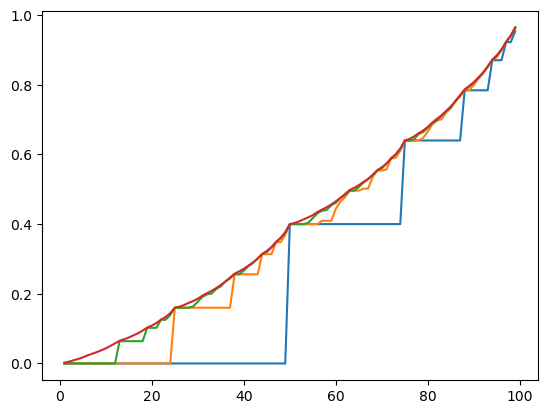

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 12, 11, 10, 16, 17,
        18,  6,  5,  4,  3,  2,  1, 25,  1,  2,  3,  4,  5,  6, 32,  8,  9,
        10, 11, 13, 12, 39, 10,  9,  8,  7,  6,  5,  4,  3,  2, 49, 50,  1,
         2,  3,  4, 45,  6,  7,  8,  9, 10, 39, 12, 37, 14, 35,  9,  8,  7,
         6,  5, 21,  3,  2, 24, 25,  1,  2,  3,  4,  5,  6, 18,  8, 16, 10,
        11, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]),
 array([0.00206562, 0.00516406, 0.00922547, 0.01291015, 0.0173854 ,
        0.02306368, 0.02781411, 0.03227539, 0.03768507, 0.0434635 ,
        0.05035447, 0.05765919, 0.06523937, 0.06953528, 0.07443124,
        0.08068847, 0.08661104, 0.09421268, 0.10314362, 0.10865874,
        0.11596663, 0.12588617, 0.13357998, 0.14414799, 0.16      ,
        0.16309844, 0.16774609, 0.17383821, 0.17936523, 0.1860781 ,
        0.19459552, 0.20172117, 0.20841308, 0.21652761, 0.22519525,
        0.2355317 , 0.24648879, 0.25785906, 0.26430292, 0.27164686,
        0.

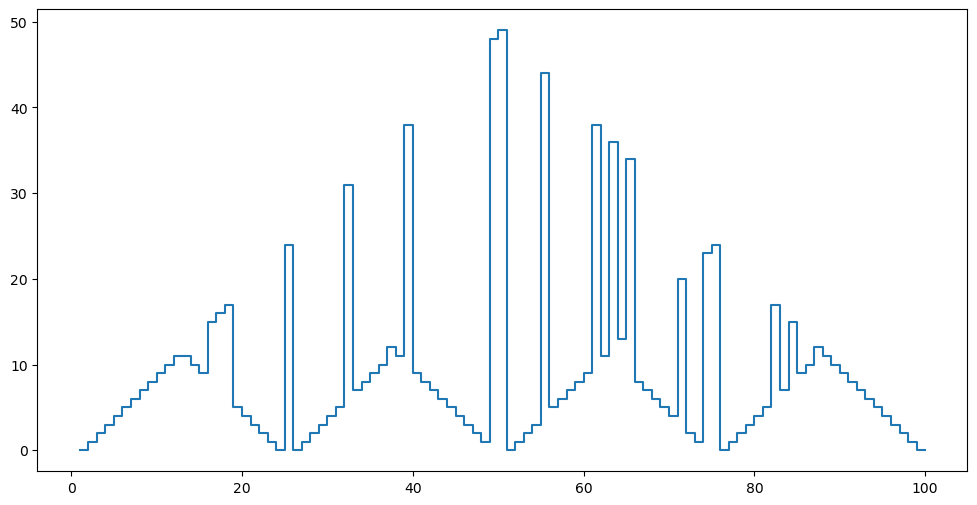

In [40]:
import numpy as np
import matplotlib.pyplot as plt

prob_win = 0.4
target_money = 100
num_states = target_money + 1
num_actions = target_money // 2

#num_nonterminal_states = target_money - 1
#win_terminal_state = num_nonterminal_states
#loss_terminal_state = win_terminal_state + 1

end_state = 0
win_state = target_money

action_state_transition = np.zeros((num_states, num_actions, num_states),dtype=float)
state_rewards = np.zeros(num_states,dtype=float)
state_rewards[win_state] = 1.0
#state_rewards[end_state] = -0.1

for state in range(1, target_money):
    money = state
    max_bet = min(money, target_money - money)
    for action in range(num_actions):
        bet = action + 1
        if bet > max_bet:
            action_state_transition[state, action, end_state] = 1.0
        else:
            action_state_transition[state, action, money + bet] = prob_win
            action_state_transition[state, action, money - bet] = 1.0 - prob_win


def value_iteration(num_iteration, gamma = 1.0):
    values = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    v_s_s = np.zeros(num_actions)
    for n in range(num_iteration):
        for state in range(num_states):
            for action in range(num_actions):
                e_reward = (action_state_transition[state, action] * state_rewards).sum()
                e_v_prime = (action_state_transition[state, action] * values).sum() * gamma
                v_s_s[action] = e_reward + e_v_prime
            policy[state] = v_s_s.argmax()
            new_v_s = v_s_s.max()
            values[state] = new_v_s
    return policy, values

for n in [1,2,3,32]:
    policy,values = value_iteration(n)
    plt.plot(range(1, target_money), values[1:target_money])

policy_x = np.zeros((target_money-1)*2)
policy_x[::2] = range(1, target_money)
policy_x[1::2] = range(1+1, target_money+1)
policy_y = np.zeros((target_money-1)*2)
policy_y[::2] = policy[1:target_money]
policy_y[1::2] = policy[1:target_money]

plt.show()
plt.figure(figsize=(12, 6))
plt.plot(policy_x, policy_y)
policy[1:target_money]+1,values[1:target_money]